# Problem Statement
To predict whether a employee will leave the bank or not based  on the features.

**Classification Problem**


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing and Understanding the Data

In [116]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [117]:
df.shape

(10000, 14)

In [118]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [120]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [121]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [122]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [123]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [124]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [125]:
df['Age'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [126]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [127]:
df['EstimatedSalary'].value_counts()

,count
EstimatedSalary,
24924.92,2
121505.61,1
89874.82,1
72500.68,1
182692.80,1
...,...
188377.21,1
55902.93,1
4523.74,1


#Feature Engineering


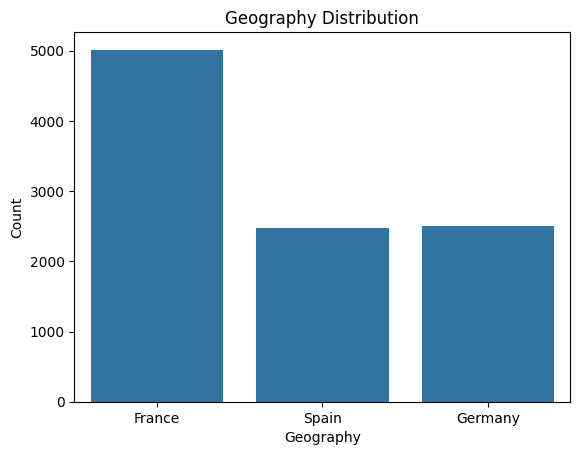

In [128]:
sns.countplot(x = df['Geography'])
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography Distribution')
plt.show()

Text(0.5, 0, 'Age')

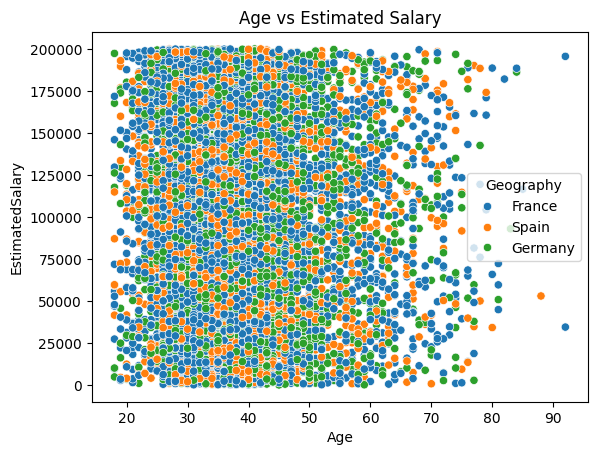

In [129]:
sns.scatterplot(data = df,x = df['Age'] , y = df['EstimatedSalary'] ,hue=df['Geography'])
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')

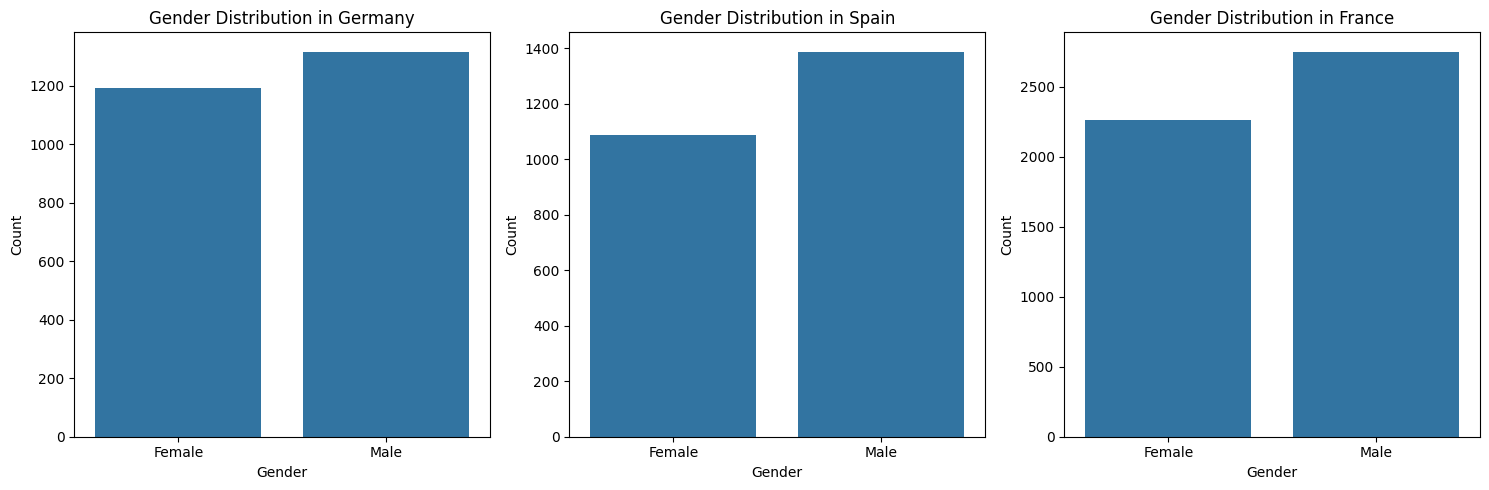

In [130]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['Geography'] == 'Germany']['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Germany')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['Geography'] == 'Spain']['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Spain')

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['Geography'] == 'France']['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in France')

plt.tight_layout()
plt.show()

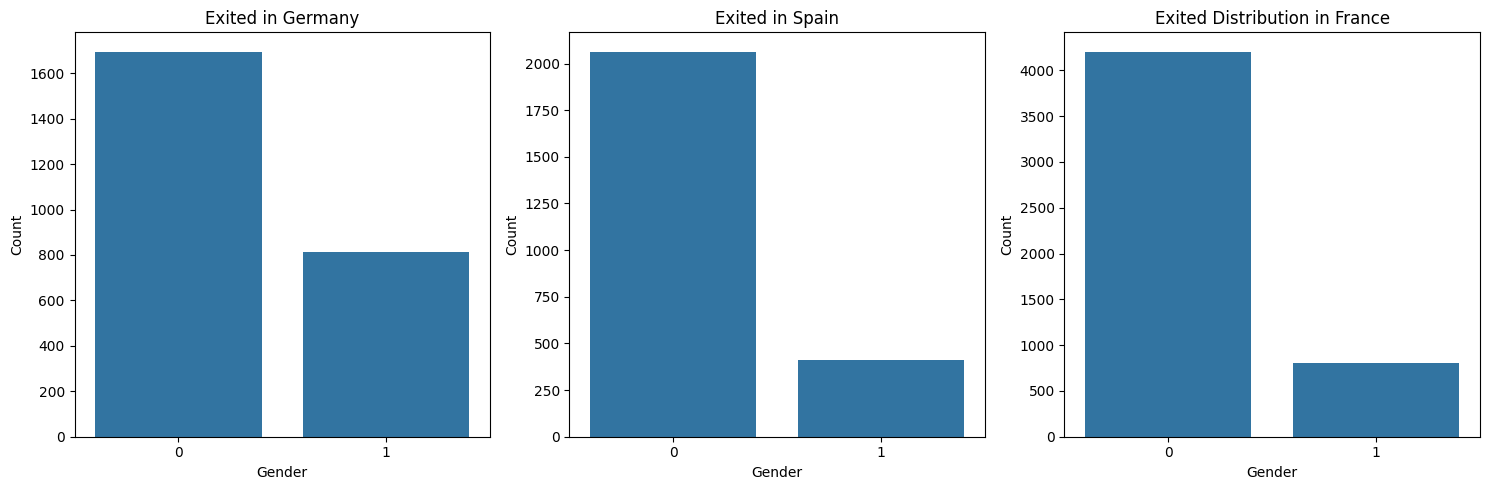

In [131]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['Geography'] == 'Germany']['Exited'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited in Germany')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['Geography'] == 'Spain']['Exited'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited in Spain')

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['Geography'] == 'France']['Exited'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited Distribution in France')

plt.tight_layout()
plt.show()

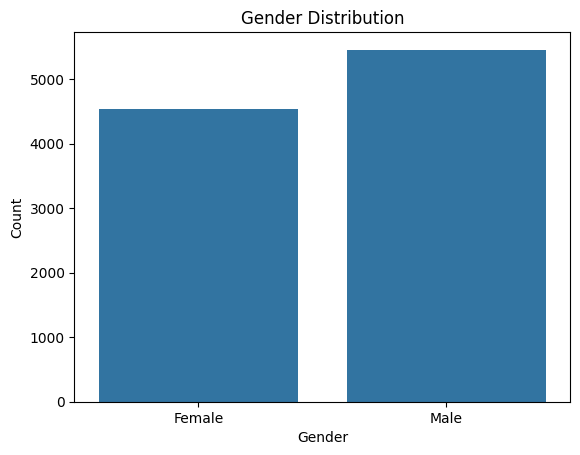

In [132]:
sns.countplot(x = df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

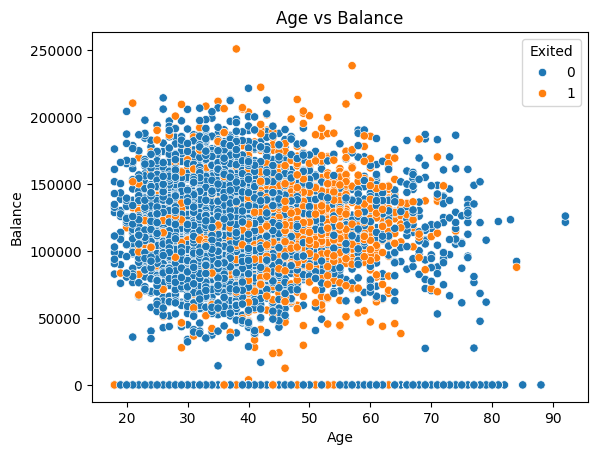

In [133]:
sns.scatterplot(data = df,x=df['Age'],y='Balance',hue = df['Exited'])
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [134]:
numeric_features = np.array(df.select_dtypes(exclude=['object']).columns)
categorical_features = np.array(df.select_dtypes(include=['object']).columns)
print('Numeric Features:',numeric_features)
print('Categorical Features:',categorical_features)

Numeric Features: ['CreditScore' 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard'
 'IsActiveMember' 'EstimatedSalary' 'Exited']
Categorical Features: ['Geography' 'Gender']


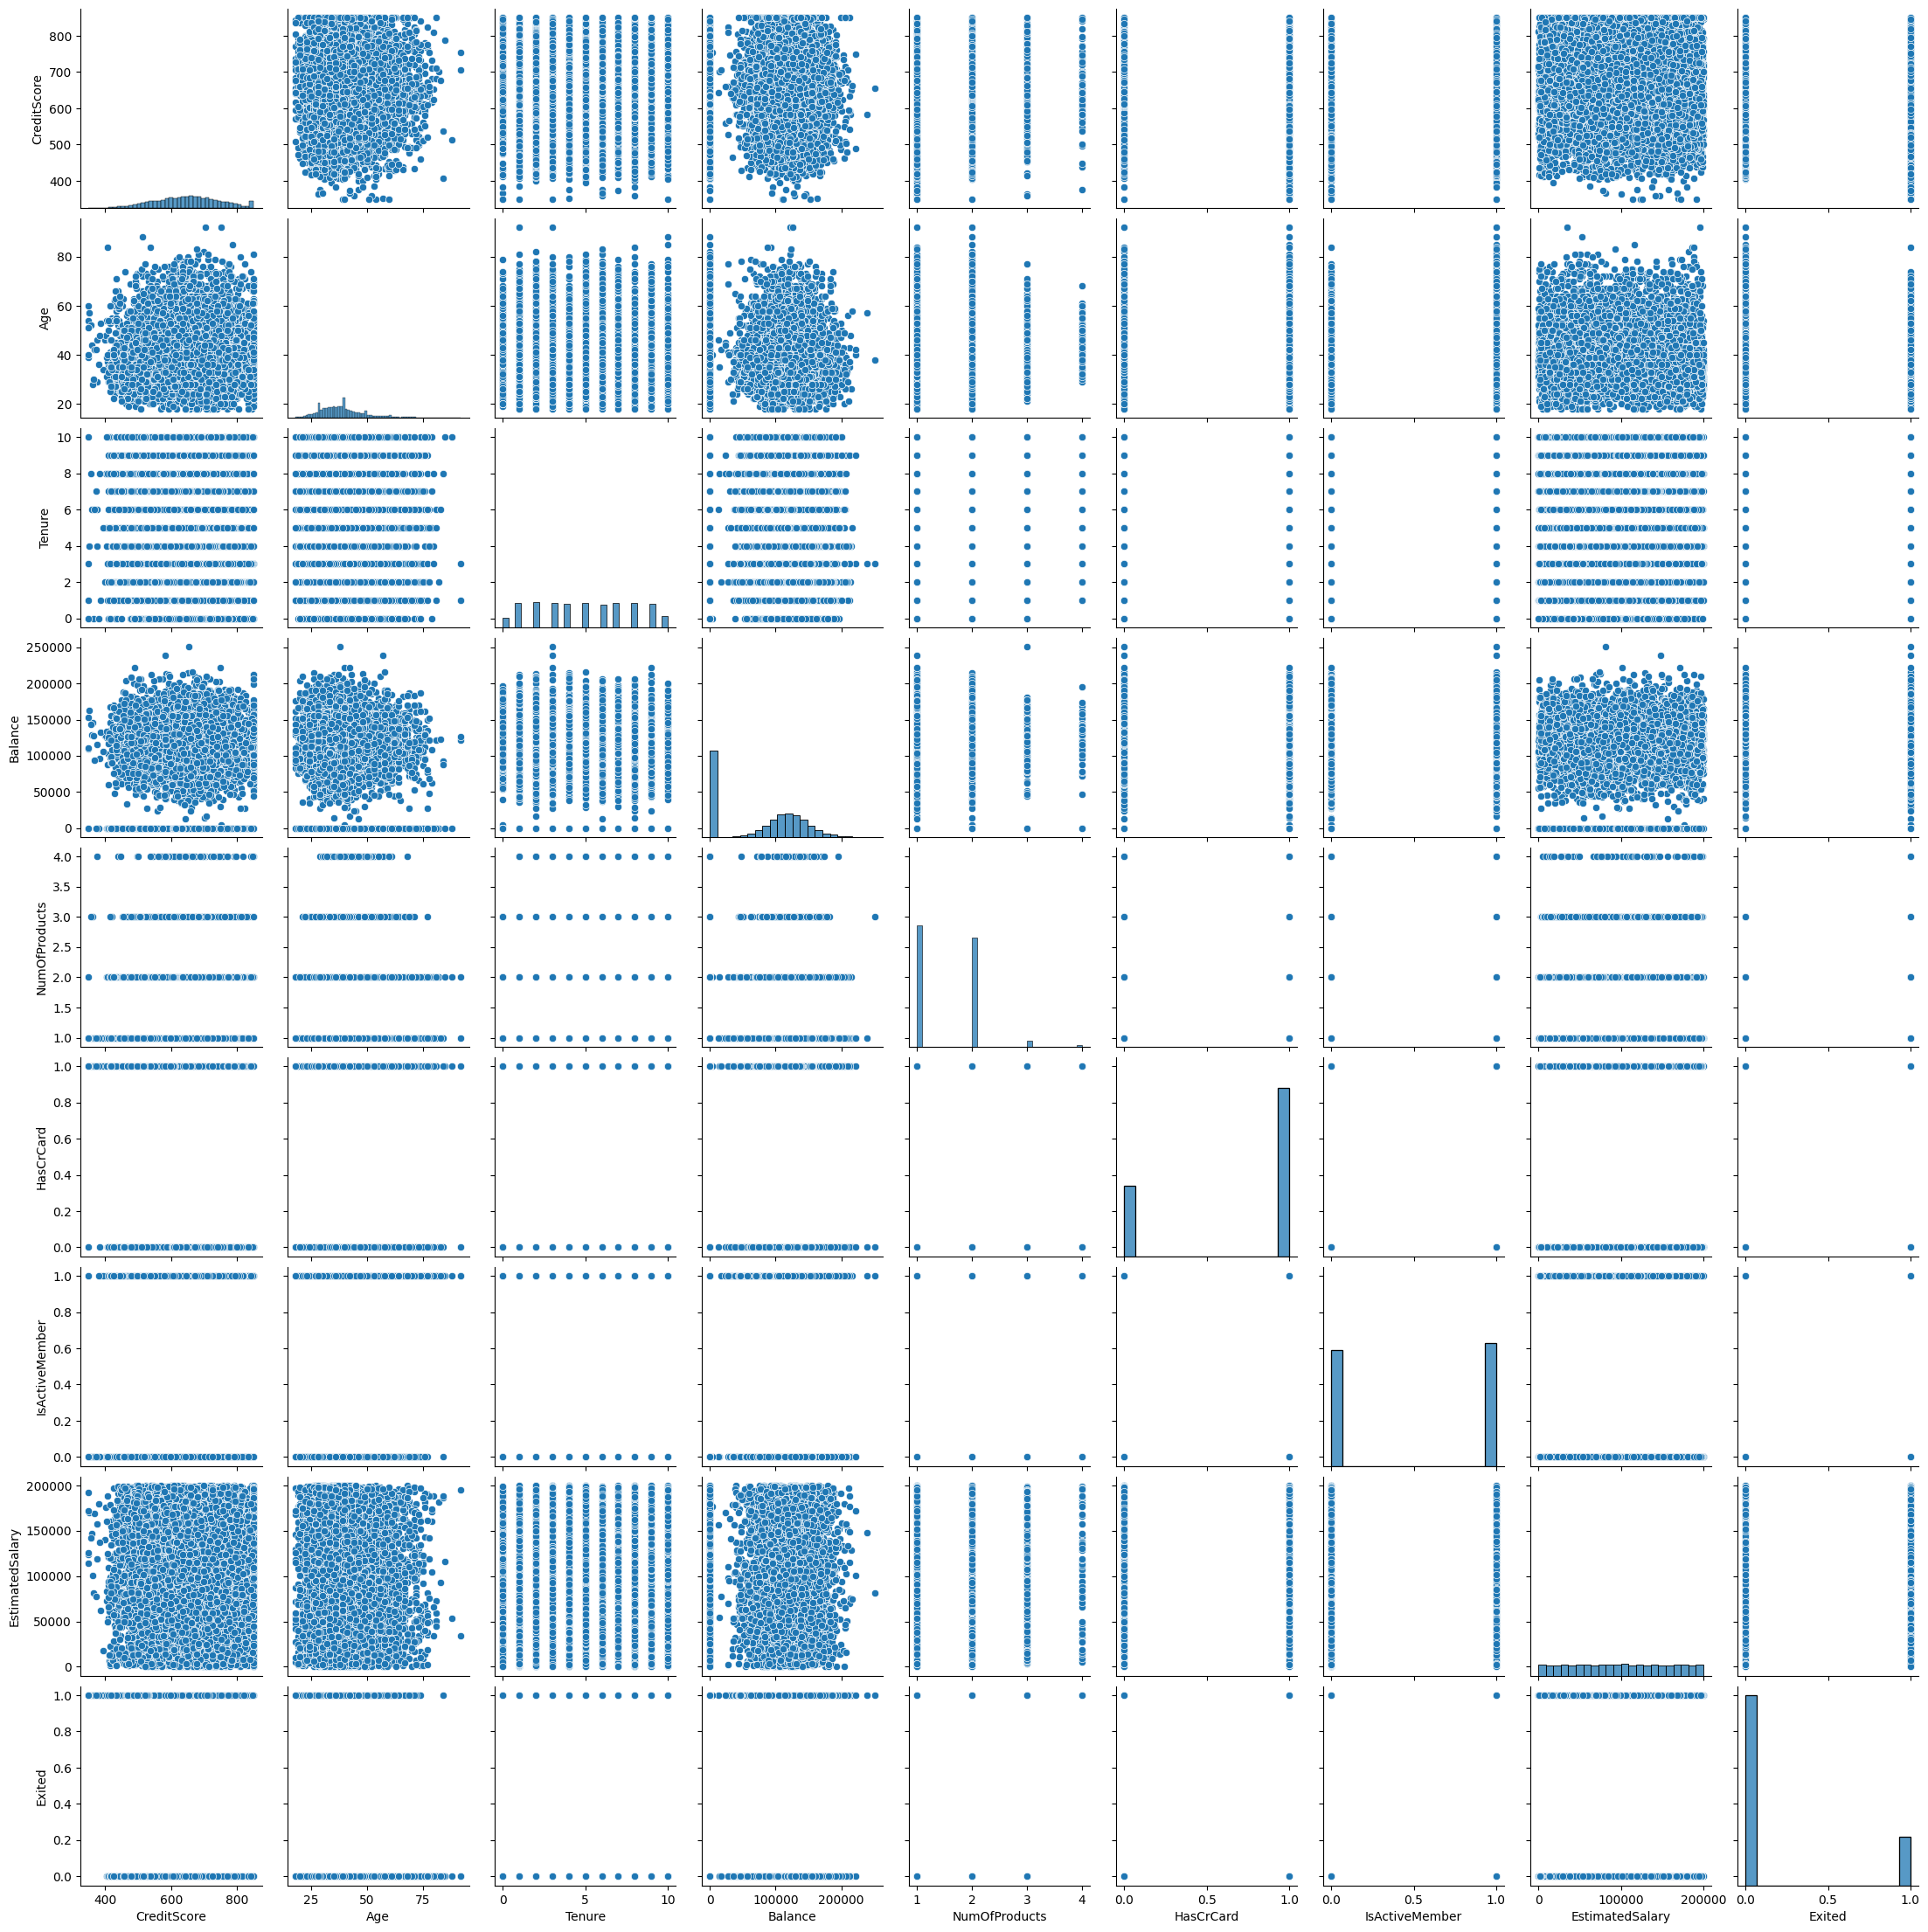

In [135]:
sns.pairplot(df)
plt.show()

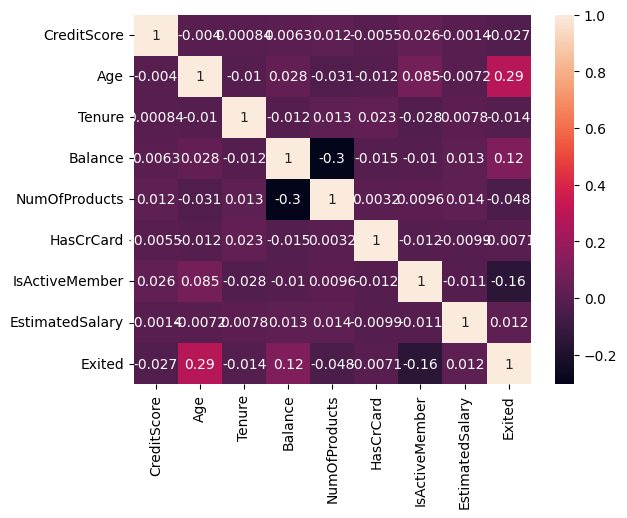

In [136]:
sns.heatmap(df[numeric_features].corr(),annot=True)
plt.show()

#Data Preparation  


In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [138]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
geography_encoded = ohe.fit_transform(df[['Geography']]).toarray()
geography_df = pd.DataFrame(geography_encoded, columns=ohe.get_feature_names_out(['Geography']))
df = pd.concat([df.drop('Geography', axis=1), geography_df], axis=1)

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [140]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [141]:
X = df.drop(columns='Exited')
y = df['Exited']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
#Apply Normal Machine Learning Algorthms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)


In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr_acc = accuracy_score(y_test,lr_y_pred)
dt_acc = accuracy_score(y_test,dt_y_pred)
rf_acc = accuracy_score(y_test,rf_y_pred)
print('Logistic Regression Accuracy:',lr_acc)
print('Decision Tree Accuracy:',dt_acc)
print('Random Forest Accuracy:',rf_acc)

Logistic Regression Accuracy: 0.811
Decision Tree Accuracy: 0.777
Random Forest Accuracy: 0.87


In [147]:
X_train.shape

(8000, 12)

In [148]:
#Now Using ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import datetime

In [149]:
#Building ANN Model
model = Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),#Hidden Layer 1
    #Passing Input Shape only in first layer and it means passing the no. of features
    Dense(units=32,activation='relu'),#Hidden Layer 2
    Dense(units=1,activation='sigmoid')#Output Layer
])

In [150]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
#Adding Optimizers ,Loss Functions and matrix in the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
#Set Up the  Tensorboard
from tensorflow.keras.callbacks import EarlyStopping
#We make this directory to capture and visualize all the logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#We use callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#Set Up Early Stopping
#We use this because if in case the model have reached its best in 20 epochs and is not increasing so we stop the model to train further
#Here Patience means waiting for 10 epochs to see
early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [153]:
#Training the ANN Model
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[tensorboard_callback,early_stop])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8140 - loss: 0.4305 - val_accuracy: 0.8530 - val_loss: 0.3483
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.3573 - val_accuracy: 0.8550 - val_loss: 0.3539
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3469 - val_accuracy: 0.8580 - val_loss: 0.3401
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8667 - loss: 0.3318 - val_accuracy: 0.8600 - val_loss: 0.3454
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8617 - loss: 0.3447 - val_accuracy: 0.8610 - val_loss: 0.3452
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3307 - val_accuracy: 0.8580 - val_loss: 0.3407
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.3174 - val_accuracy: 0.8485 - val_loss: 0.3530
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8693 - loss: 0.3116 - val_accu

In [154]:
ann_acc = history.history['val_accuracy'][-1]
print('ANN Model Accuracy:', ann_acc)

ANN Model Accuracy: 0.8550000190734863


In [155]:
pip install scikeras

In [156]:
#Performing Hyperparameter Tuning
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [157]:
#Defining a  function to create the model and try different parameters
def create_model(neurons=32, layer=1):
  model = Sequential()
  model.add(Dense(units=neurons, activation='relu', input_shape=(X_train.shape[1],)))
  for i in range(layer - 1):
    model.add(Dense(units=neurons, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [158]:
## Create a Keras classifier
model=KerasClassifier(layers=1,neurons=32,build_fn=create_model,verbose=1)

In [159]:
#Defing grid parameters
param_grid = {
    'neurons':[16,32,64,128],
    'layer':[1,2,3],
    'epochs':[50,100]
}

In [160]:
#Performing GridSearch
from sklearn.model_selection import GridSearchCV
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,verbose=1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
#Saving The Model
# h5 is compatible with keras
model.save('ann_model.h5')

In [ ]:
#Loading Tensorboard Extension
%load_ext tensorboard
%tensorboard --logdir logs/fit